<a href="https://colab.research.google.com/github/pjhoon1004/ml_book_/blob/main/(cmass)linear_regression(advertising).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://www.kaggle.com/code/anubhavgoyal10/simple-linear-regression/notebook

#https://www.kaggle.com/code/anubhavgoyal10/simple-linear-regression

In [ ]:
from google.colab import files
filename = list(files.upload().keys())[0]

Saving advertising.csv to advertising (4).csv


In [ ]:
import pandas as pd
advertising = pd.read_csv(filename) 
advertising.sample(5)

,TV,Radio,Newspaper,Sales
73,129.4,5.7,31.3,11.0
140,73.4,17.0,12.9,10.9
91,28.6,1.5,33.0,7.3
190,39.5,41.1,5.8,10.8
169,284.3,10.6,6.4,20.0


In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [69]:
(advertising==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

##EDA

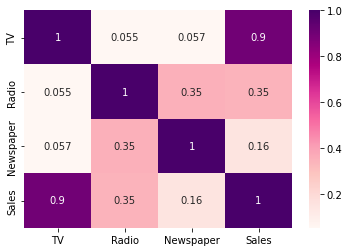

In [ ]:
# Checking for correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(advertising.corr(), cmap= 'RdPu', annot = True)
plt.show()

Text(0.5, 1.0, 'Features Correlating with Sales')

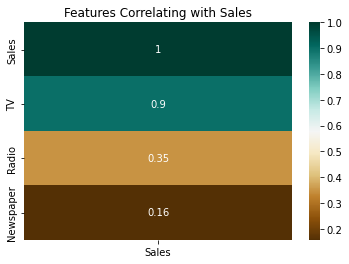

In [ ]:
corrMatrix=advertising.corr()
heatmap = sns.heatmap(corrMatrix[['Sales']].sort_values(by='Sales', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales')

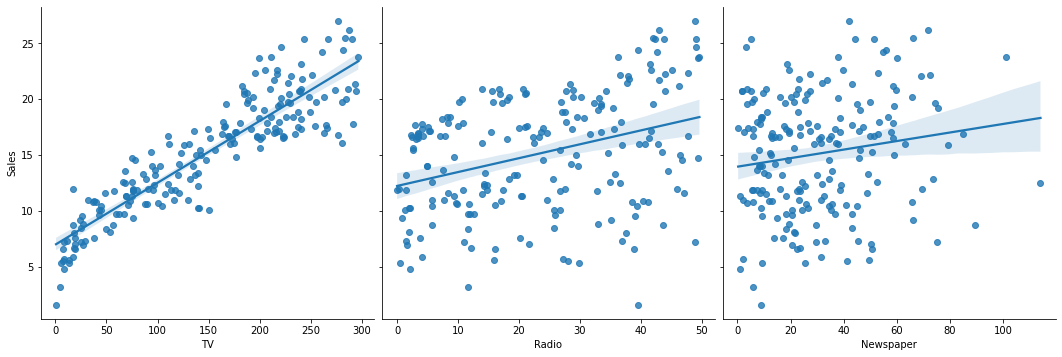

In [ ]:
sns.pairplot(data = advertising, x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'], height=5, kind='reg')

##단순 선형회귀

In [ ]:
x_data1 = advertising[['TV']]
y_data1 = advertising['Sales']

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(x_data)\n'

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size=0.3, random_state=10)
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression() #모델 생성
lr_model1.fit(x_train1,y_train1) #모델 학습

LinearRegression()

##평가

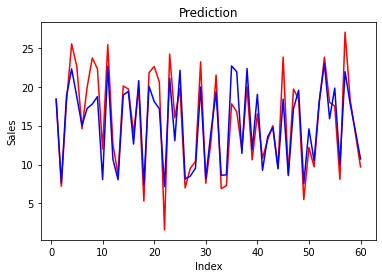

In [ ]:
# Plotting predicted value vs Actual value
y_pred1 = lr_model1.predict(x_test1)
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r')
plt.plot(c, y_pred1, color = 'b')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

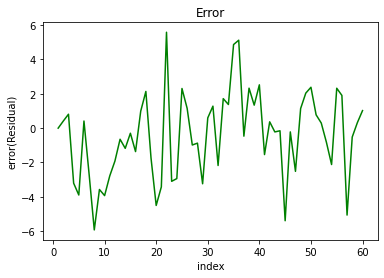

In [ ]:
error = y_pred1 - y_test1
plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(Residual)')
plt.title('Error')
plt.show()

In [67]:
print(f'MSE :{mean_squared_error(y_pred1, y_test1):.2f}')
print(f'r2_score:{r2_score(y_pred1, y_test1):.2f}')

MSE :6.46
r2_score:0.75


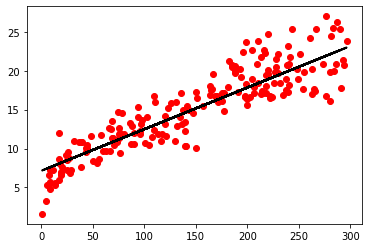

In [68]:
plt.scatter(x_data1,y_data1, color = 'red', label = 'scatter plot')
plt.plot(x_test1, y_pred1, color = 'black', linewidth = 2,label = 'Regression Line')

In [ ]:
#Slopes/Coefficients
w1 = lr_model1.coef_
print(f'slopes of TV :{w1[0]:.2f}')

#Intercept
b1 = lr_model1.intercept_
print("Intercept is : ",b1.round(2))

slopes of TV :0.05
Intercept is :  7.15


# 다중선형회귀

In [ ]:
x_data2 = advertising.drop(['Sales'],axis=1)
y_data2 = advertising['Sales']

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(x_data)\n'

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.3, random_state=10)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model2 = LinearRegression()
lr_model2.fit(x_train2,y_train2)

LinearRegression()

In [ ]:
mlr = pd.DataFrame({'Actual_value' : y_test2.squeeze() , "Model prediction" : lr_model2.predict(x_test2).squeeze() })
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


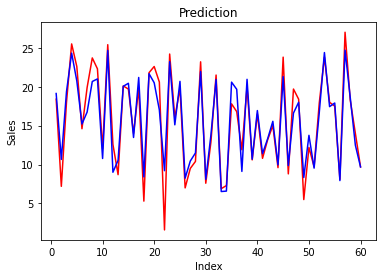

In [ ]:
# Plotting predicted value vs Actual value
y_pred2 = lr_model2.predict(x_test2)
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color = 'b')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

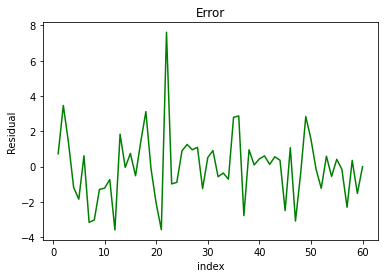

In [ ]:
error2 = y_pred2 - y_test2
plt.plot(c, error2, color = 'g')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

In [ ]:
print(f'MSE :{mean_squared_error(y_pred2,y_test2):.2f}')
print(f'r2_score:{r2_score(y_pred2, y_test2):.2f}')

MSE :3.66
r2_score:0.87


In [ ]:
#Slopes/Coefficients
w2 = lr_model2.coef_
print(f'slopes of TV :{w2[0]:.2f}')
print(f'slopes of Radio :{w2[1]:.2f}')
print(f'slopes of Newspaper :{w2[2]:.2f}')

#Intercept
b2 = lr_model2.intercept_
print("Intercept is : ",b2.round(2))

slopes of TV :0.05
slopes of Radio :0.11
slopes of Newspaper :0.00
Intercept is :  4.91


다항식 회귀 분석은 선형 회귀 분석과 비교하여 우리에게 좋은 정확도를 제공한다.
우리는 이 데이터 세트에서 2등급의 다항식 회귀를 선호할 수 있다.
판매를 늘리기 위해서 회사는 그것의 종말이 갈수록 TV에 더 집중해야 한다